In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\nirma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

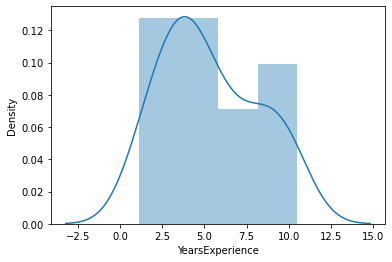

In [4]:
sns.distplot(dataset['YearsExperience'])


C:\Users\nirma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

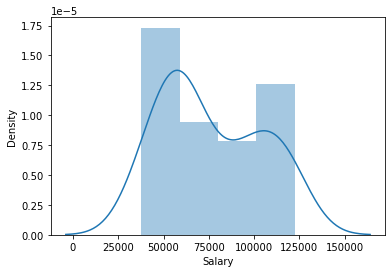

In [5]:
sns.distplot(dataset['Salary'])


In [6]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

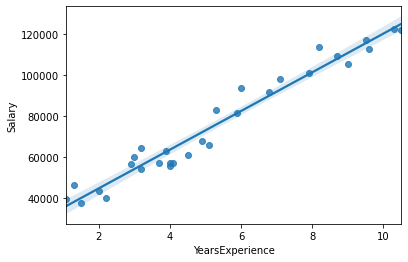

In [7]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

In [8]:
model=smf.ols("Salary~YearsExperience",data=dataset).fit()

In [9]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [10]:
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [11]:
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           1.14e-20
Time:                        19:08:48   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model1 = smf.ols("Salary~np.log(YearsExperience)",data=dataset).fit()


In [14]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           3.25e-13
Time:                        19:10:22   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model1.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [16]:
model2=smf.ols("Salary~np.exp(YearsExperience)",data=dataset).fit()

In [17]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     25.07
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           2.72e-05
Time:                        19:12:04   Log-Likelihood:                -339.03
No. Observations:                  30   AIC:                             682.1
Df Residuals:                      28   BIC:                             684.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                6.757e+04   4065.396     16.620      0.000    5.92e+04    7.59e+04
np.exp(YearsExperience)     2.1360      0.427      5.007      0.000       1.262       3.010
==============================================================================
Omnibus:                        4.567   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                1.966
Skew:                           0.276   Prob(JB):                        0.374
Kurtosis:                       1.874   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
pred=model.predict(dataset)

Text(0, 0.5, 'Salary')

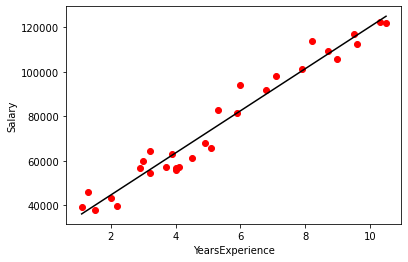

In [31]:
plt.scatter(x=dataset.YearsExperience, y=dataset.Salary, color='red')
plt.plot(dataset.YearsExperience, pred,color='black')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [25]:
pred=model1.predict(dataset)

Text(0, 0.5, 'Salary')

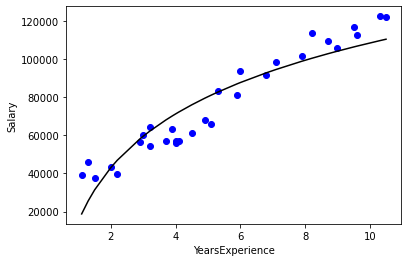

In [26]:
plt.scatter(x=dataset.YearsExperience, y=dataset.Salary, color='blue')
plt.plot(dataset.YearsExperience, pred,color='black')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [32]:
pred=model2.predict(dataset)

Text(0, 0.5, 'Salary')

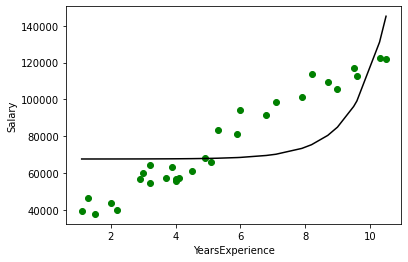

In [33]:
plt.scatter(x=dataset.YearsExperience, y=dataset.Salary, color='green')
plt.plot(dataset.YearsExperience, pred,color='black')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")